<a href="https://colab.research.google.com/github/Amir-Shakiba/deep_mnist/blob/master/deep_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading mnist


In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import numpy as np

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
np.shape(x_train),np.shape(x_test),np.shape(y_train)

((60000, 28, 28), (10000, 28, 28), (60000,))

making one hot vectors


In [0]:
from keras.utils.np_utils import to_categorical
y_train2 = to_categorical(y_train,num_classes=10)
y_test2 = to_categorical(y_test,num_classes=10)

In [0]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [0]:
y_train2[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

separating a part for validation


In [0]:
x_valid=x_train[0:10000]/255.0
y_valid=y_train2[0:10000]
x_train_partial=x_train[10000:]/255.0
y_train_partial=y_train2[10000:]


In [0]:
np.shape(x_valid),np.shape(y_valid),np.shape(x_train_partial),np.shape(y_train_partial
                                                                      )

((10000, 28, 28), (10000, 10), (50000, 28, 28), (50000, 10))

In [0]:
from keras import models
from keras import layers

In [0]:
from keras import optimizers

creating the deep model


In [0]:
def create_model():
    model=models.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(1000,activation='relu',input_shape=(28*28,)))
    model.add(layers.Dense(500,activation='relu'))
    #model.add(layers.Dense(250,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    rms=optimizers.RMSprop(lr=0.001)
    model.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [0]:
num_epochs=50

starting training

In [0]:
model=create_model()
history=model.fit(x_train_partial,y_train_partial,validation_data=(x_valid, y_valid),epochs=num_epochs,batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.2297 - acc: 0.9290 - val_loss: 0.1339 - val_acc: 0.9588
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0840 - acc: 0.9731 - val_loss: 0.0828 - val_acc: 0.9774
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0546 - acc: 0.9829 - val_loss: 0.0972 - val_acc: 0.9708
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0390 - acc: 0.9879 - val_loss: 0.1016 - val_acc: 0.9753
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0299 - acc: 0.9914 - val_loss: 0.0948 - val_acc: 0.9782
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.1043 - val_acc: 0.9775
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.0192 - acc: 0.9942 - val_loss: 0.1128 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5010      
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
import matplotlib.pyplot as plt
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
len()

10

loss and accuracy graphs

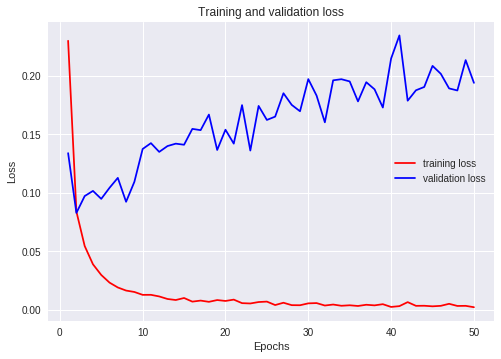

In [0]:
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, history_dict['loss'], 'r', label='training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

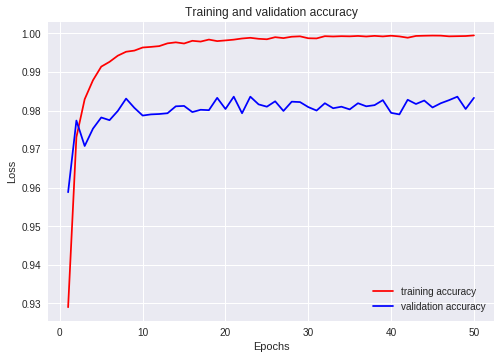

In [0]:
plt.plot(epochs, history_dict['acc'], 'r', label='training accuracy')
plt.plot(epochs, history_dict['val_acc'], 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()